In [91]:
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors

In [2]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [218]:
sentences = ['Python, Java, SQL', 
             'Python, Java',
             'SQL',
             'Java, Python, SQL', 
             'Haskell, C++, Rust', 
             'Nursing, Medicine, Health', 
             'Nursing, Crisis Intervention, Health',
             'Nursing, delivery',
             'Delivery, Medicine Health',
             'Python, Java, SQL, C++',
             'C++, Rust',
             'Rust, C++',
             'C++',
             'C',
             'Rust', 
             'Haskell']

In [219]:
embeddings = model.encode(sentences, convert_to_tensor=True)

In [220]:
embeddings

tensor([[ 0.0082, -0.0190, -0.0605,  ...,  0.0702,  0.1088,  0.0033],
        [-0.0599,  0.0200, -0.0385,  ...,  0.0838,  0.1042, -0.0041],
        [ 0.0758,  0.0012, -0.0320,  ...,  0.0275,  0.0495,  0.0137],
        ...,
        [-0.0183,  0.0714, -0.0665,  ...,  0.0386, -0.0014,  0.0359],
        [-0.1076,  0.0626,  0.0197,  ..., -0.0360,  0.0142,  0.0276],
        [-0.0743,  0.0343,  0.0015,  ...,  0.0668,  0.0685, -0.0255]])

#### similarity

In [221]:
cosine_similarity([embeddings[0]], [embeddings[1]])

array([[0.73250073]], dtype=float32)

In [222]:
cosine_similarity([embeddings[0]], [embeddings[4]])

array([[0.17740303]], dtype=float32)

In [223]:
cosine_similarity([embeddings[0]], [embeddings[2]])

array([[0.602589]], dtype=float32)

In [224]:
cosine_similarity([embeddings[0]], [embeddings[3]])

array([[0.9963145]], dtype=float32)

In [225]:
cosine_similarity([embeddings[3]], [embeddings[2]])

array([[0.61398077]], dtype=float32)

#### differences

In [245]:
knn = NearestNeighbors(n_neighbors=5, metric='cosine')

In [246]:
knn.fit(embeddings)

,n_neighbors,5
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [247]:
print(sentences[0])
print(sentences[1])

Python, Java, SQL
Python, Java


In [248]:
diff = embeddings[0] - embeddings[1]

In [249]:
# find the nearest neighbor for the difference vector
distances, indices = knn.kneighbors([diff])

In [250]:
indices

array([[2, 0, 3, 9, 6]])

In [251]:
sentences[indices[0][0]]

'SQL'

In [252]:
diff2 = embeddings[1] - embeddings[0]

In [253]:
distances, indices = knn.kneighbors([diff2])

In [254]:
indices

array([[ 1, 11, 12, 10,  4]])

In [255]:
sentences[indices[0][0]]

'Python, Java'

In [256]:
print(sentences[4])
print(sentences[10])

Haskell, C++, Rust
C++, Rust


In [257]:
diff3 = embeddings[10] - embeddings[4]

In [258]:
distances3, indices3 = knn.kneighbors([diff3])

In [259]:
indices3

array([[10, 14, 11, 12, 13]])

In [266]:
sentences[indices3[0][4]]

'C'

#### graphing

In [281]:
reducer_2 = TSNE(n_components=2, perplexity=5, random_state=42)

In [282]:
embeddings_2d = reducer_2.fit_transform(embeddings)

In [283]:
embeddings_2d

array([[ -33.832283,  -20.96217 ],
       [  -9.521852,  -14.528947],
       [ -61.761757,  -27.0642  ],
       [ -45.28455 ,   -7.340357],
       [  51.765457,   50.676643],
       [  37.46266 ,  -88.75786 ],
       [  44.801437, -108.22668 ],
       [  59.860405,  -84.98229 ],
       [  56.30291 ,  -67.71628 ],
       [ -26.801115,    4.609741],
       [  51.048767,   77.09668 ],
       [  34.557808,   71.96567 ],
       [   9.290199,   63.82399 ],
       [ -14.192411,   62.749294],
       [  43.025295,   99.17693 ],
       [  57.62995 ,   30.338947]], dtype=float32)

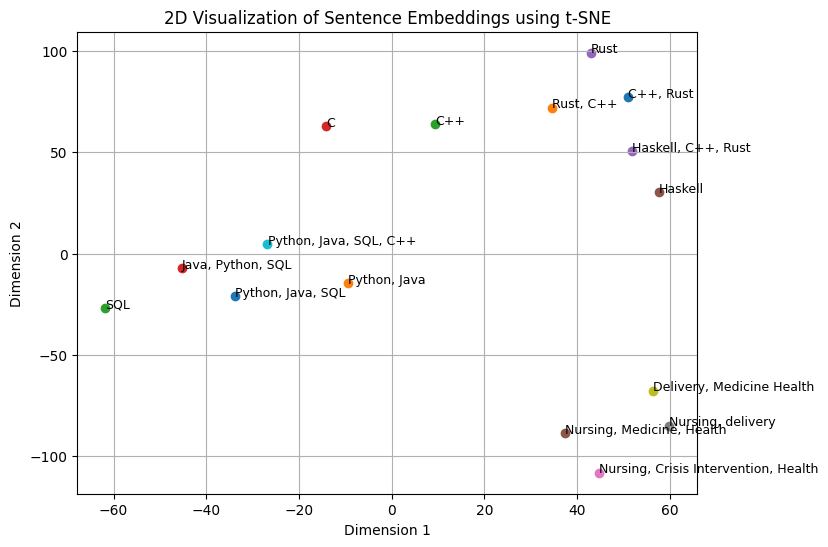

In [284]:
# plot embeddings_2d
plt.figure(figsize=(8, 6))
for i, sentence in enumerate(sentences):
    x, y = embeddings_2d[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, sentence, fontsize=9)  
plt.title('2D Visualization of Sentence Embeddings using t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

In [288]:
reducer_3d = TSNE(n_components=3, perplexity=8, random_state=42)

In [289]:
embeddings_3d = reducer_3d.fit_transform(embeddings)

In [290]:
fig = go.Figure(data=[go.Scatter3d(
    x=embeddings_3d[:, 0],
    y=embeddings_3d[:, 1],
    z=embeddings_3d[:, 2],
    mode='markers+text',
    text=sentences,
    textposition='top center',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)])

fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))
fig.show()